<a href="https://colab.research.google.com/github/namra98/Deep-Learning/blob/master/CNN_Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras import optimizers
from sklearn.metrics import accuracy_score
from keras.optimizers import SGD
from keras.datasets import cifar10



Using TensorFlow backend.


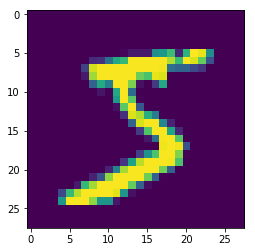

In [0]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, Y_test) = mnist.load_data()
plt.imshow(X_train[0,:,:])

X_train = (X_train / 255) - 0.5
X_test = (X_test / 255) - 0.5

X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

# X_train = X_train.reshape((-1, 784))
# X_test = X_test.reshape((-1, 784))

In [0]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
BATCH_SIZE = 64
EPOCHS = 5
model.summary()
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_45 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_46 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.4127 - acc: 0.8770
Epoch 2/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.2140 - acc: 0.9351
Epoch 3/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.1623 - acc: 0.9503
Epoch 4/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.13

In [0]:
input_shape = (28, 28, 1)

num_filters = 8
filter_size = 3
pool_size = 2
# 98.17 %
# model = Sequential([
#   Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
#   MaxPooling2D(pool_size=pool_size),
#   Flatten(),
#   Dense(10, activation='softmax'),
# ])


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=64,
          epochs=10)

Epoch 1/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.2161 - acc: 0.9334
Epoch 2/10
60000/60000 [==============================] - 149s 2ms/step - loss: 0.0837 - acc: 0.9747
Epoch 3/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0623 - acc: 0.9805
Epoch 4/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0510 - acc: 0.9839
Epoch 5/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0436 - acc: 0.9863
Epoch 6/10
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0365 - acc: 0.9885
Epoch 7/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0339 - acc: 0.9890
Epoch 8/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0298 - acc: 0.9906
Epoch 9/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0259 - acc: 0.9915
Epoch 10/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0265 - a